Задание № 1 В специальной лотерее игрок выбирает 5 разных чисел из возможных 30. В этот же день случайным образом определяется 
победная комбинация из 7 разных чисел (из того же набора). Игрок считается победителем в случае, если совпадают любые 4 числа 
в выбранном им наборе и в победной комбинации.
Какова вероятность выигрыша? 

In [169]:
N= 30
K= 7
NK = 30 - 7
n= 5
k= 4
nk = 5 - 4
def factorial(n):
    if n == 1:
        return 1
    else: 
        return n * factorial(n-1)

ckK = factorial(K)/(factorial(K-k)*factorial(k))
cnkNK = factorial(NK)/(factorial(NK-nk)*factorial(nk))
cnN = factorial(N)/(factorial(N-n)*factorial(n))
p = (ckK*cnkNK)/cnN
p
    



0.005648884959229787

Ответ: 0.0056

Задание № 2
Можно ли с уверенностью утверждать, что удержание первого дня за период с 15 по 18 сентября выше, чем удержание первого дня за период с 19 по 22 сентября? И почему?

In [7]:
import pandas as pd
from datetime import datetime

In [151]:
player = pd.read_csv('Lightmap. Тестовое задание №2.csv')
player['date'] = player['event_timestamp'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))
fo = player[['player_id', 'date', 'event_name']]

In [112]:
inst = fo[(fo.date == '2021-09-15') & (fo.event_name == 'install')]
login = fo[(fo.date == '2021-09-16') & (fo.event_name == 'login')]
relogin = login.rename({'date':'rdate', 'event_name':'revent_name'},axis=1)


In [143]:
def install(first, last):
    quantinstall = 0
    start_date = date(2021, 9, first)
    end_date = date(2021, 9, last)
    day_count = (end_date - start_date).days + 1
    for single_date in (start_date + timedelta(n) for n in range(day_count)):
        quantinstall += len(fo[(fo.date == str(single_date)) & (fo.event_name == 'install')])
    return quantinstall

install(15, 18)

5873

In [148]:
def login(first, last):
    quantlogin = 0
    start_date = date(2021, 9, first)
    end_date = date(2021, 9, last)
    day_count = (end_date - start_date).days + 1
    for single_date in (start_date + timedelta(n) for n in range(day_count)):
        inst = fo[(fo.date == str(single_date)) & (fo.event_name == 'install')]
        login = fo[(fo.date == str(single_date + timedelta(days=1))) & (fo.event_name == 'login')]
        relogin = login.rename({'date':'rdate', 'event_name':'revent_name'},axis=1)
        quantlogin = quantlogin + len(relogin.join(inst.set_index('player_id'), on='player_id', how='inner'))
    return quantlogin

login(15, 18)

4094

In [155]:
p1 = int((login(15, 18)/install(15, 18))*100)
p2 = int((login(19, 22)/install(19, 22))*100)
print('P1=', p1, 'P2=', p2)

P1= 69 P2= 56


Ответ: Да, можно

Задание № 3 Требуется построить кривую накопительной суммы платежей когорты по дням с момента регистрации (один день - одна 
точка на кривой).

In [175]:
import matplotlib.pyplot as plt

In [213]:
trans = pd.read_csv('Lightmap. Тестовое задание №3.csv')
trans['event_day'] = trans['event_timestamp'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d'))
trans.head()

,event_timestamp,registration_timestamp,inapp_size,event_day
0,1611154038,1610971359,5,2021-01-20
1,1611759898,1610972522,3,2021-01-27
2,1611057594,1610974545,5,2021-01-19
3,1611562555,1610976251,3,2021-01-25
4,1611082290,1610976461,3,2021-01-19


<AxesSubplot:>

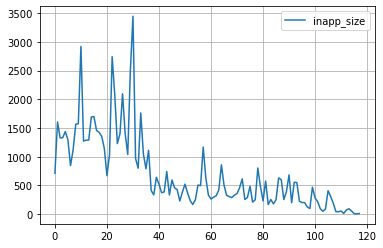

In [211]:
asf = trans.groupby(trans['event_day'])['inapp_size'].sum().reset_index()
asf.plot(grid=True)